# 1. Project Title: Jewellery price optimization with Machine Learning
This project aims to successfully
* improve speed and scalability
* cut down cost of hiring gem experts

## 02.Data Understanding
EDA - 
* Sifting through data to extract insights
* preparation of dataset in appropriate manner

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# set visualization 
sns.set() #visualization theme

In [4]:
# import dataset
data = pd.read_csv("Jewelry_Dataset.csv")


In [5]:
# peek at data
data.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [6]:
data.shape

(95910, 13)

In [7]:
data.columns = [
     "Order_Datetime",
     "Order_ID",
     "Product_Id",
     "SKU_Quantity",
     "Category_ID",
     "Category",
     "Brand_ID",
     "Price_USD",
     "User_ID",
     "Target_Gender",
     "Main_Color",
     "Main_Metal",
     "Main_Gem",
]    

In [8]:
data.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [9]:
# check missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_Id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [10]:
data.shape

(95910, 13)

In [11]:
# feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_Id         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [12]:
data.describe()

,Order_ID,Product_Id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [14]:
num_duplicated = len(data.loc[data.duplicated()])

In [15]:
print (f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [16]:
# Features with a cardinality of 1 (invariant features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [17]:
invariant_features

['SKU_Quantity']

In [18]:
# check for label distribution
data["Price_USD"].skew()

18.95906072625981

In [19]:
data["Price_USD"].kurtosis()

1054.8979068506155

E:\Users\loise\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


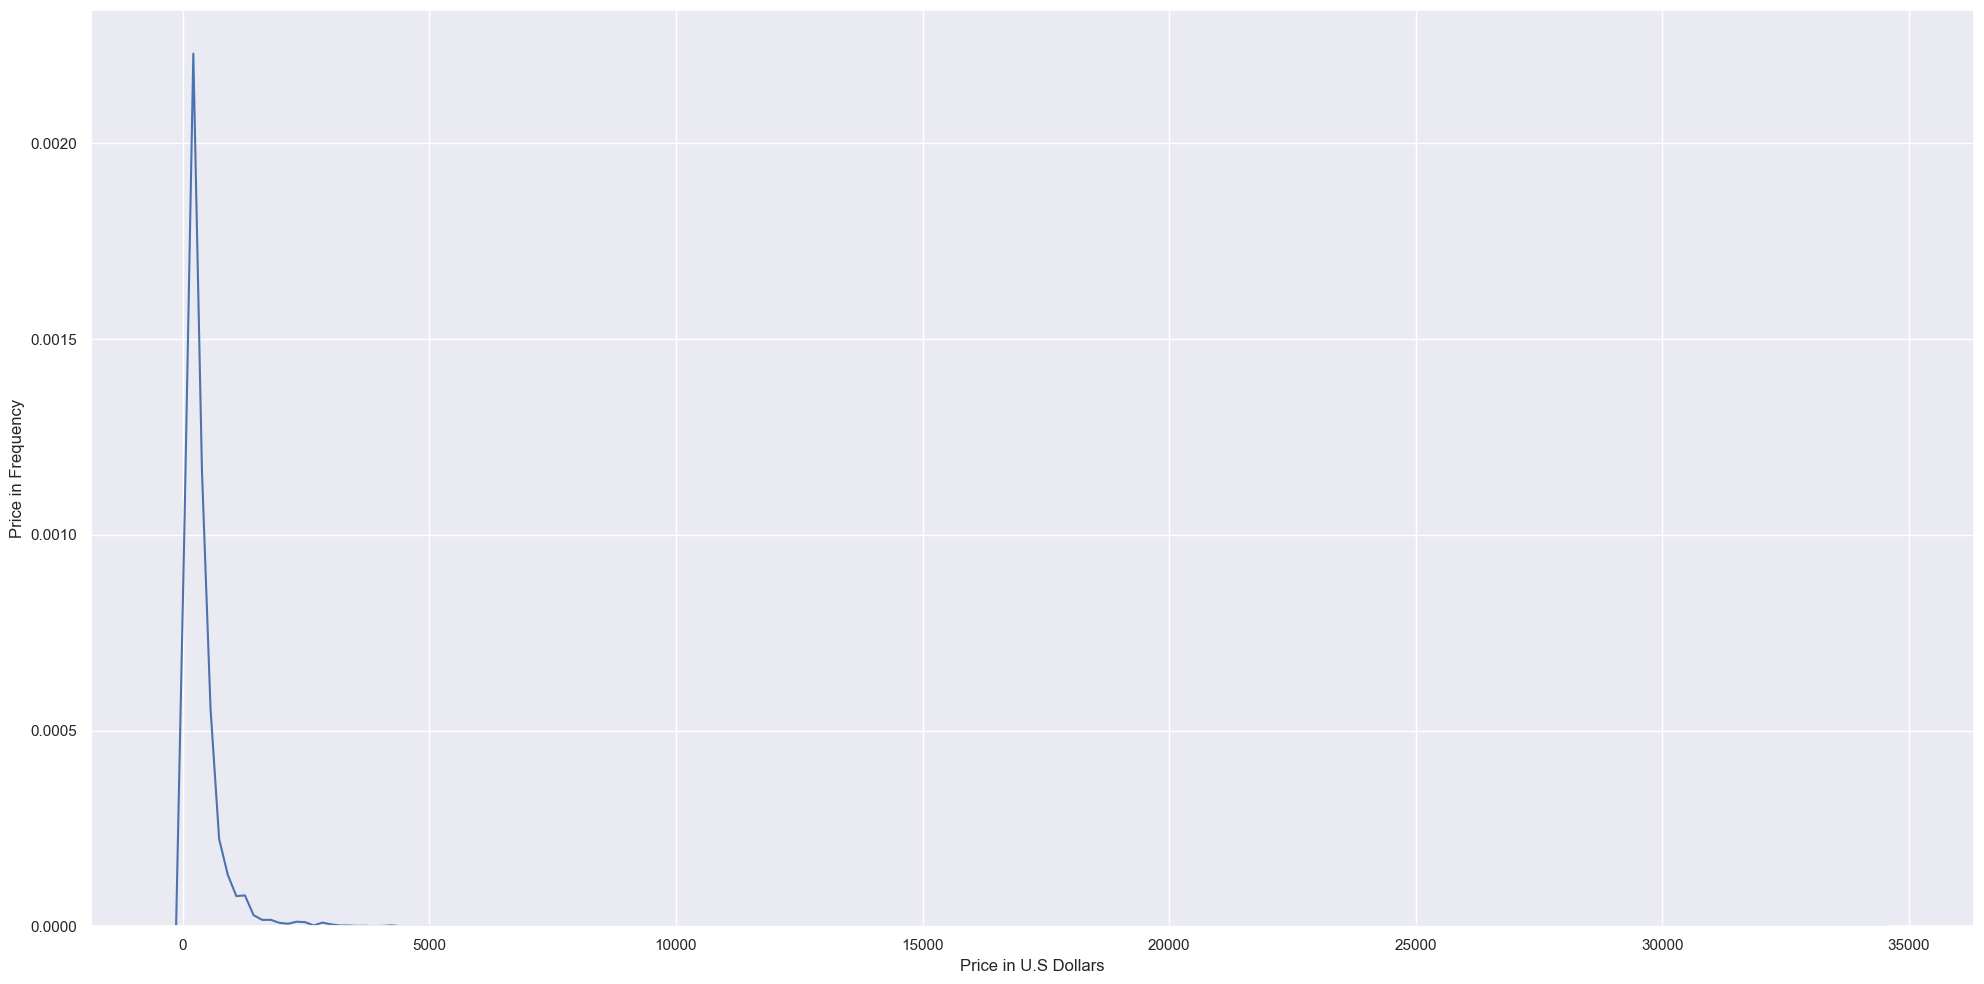

In [20]:
# visualize price for distribution
plt.figure(figsize = (20,10))
sns.kdeplot(data = data, x = "Price_USD")
plt.xlabel("Price in U.S Dollars")
plt.ylabel("Price in Frequency")
plt.tight_layout()
plt.show();plt.close()           



           

In [21]:
#target_Gender
data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [22]:
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

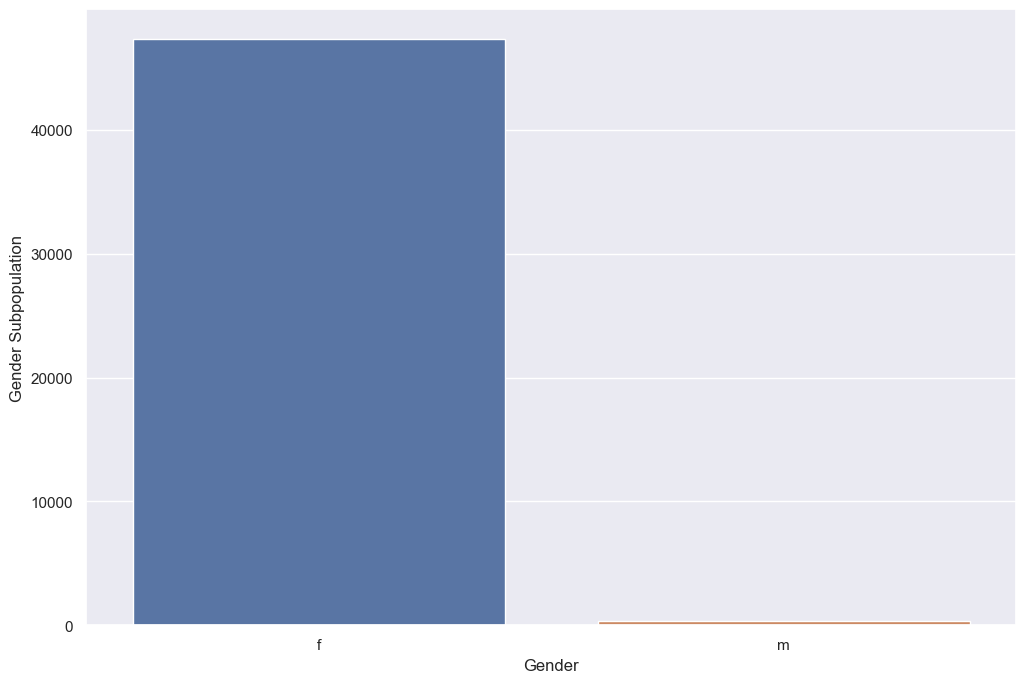

In [23]:
#visualize target gender
plt.figure(figsize = (12,8))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()

In [24]:
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [25]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [26]:
#Extract the actual categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [27]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [28]:
real_categories = data.loc[data["Category"].isin(categories)]

In [29]:

#percentes of missing values
100* data.isnull().sum() /len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [30]:
100 * real_categories.isnull().sum()/len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

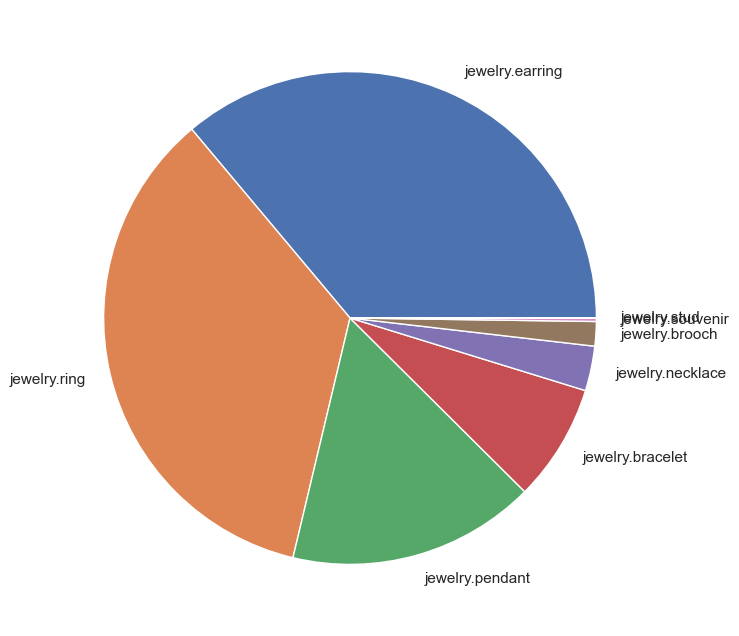

In [31]:
#visualuze jewelery categories

subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12, 8))  

plt.pie(x = counts, labels = jewelry_categories)

plt.show();plt.close()

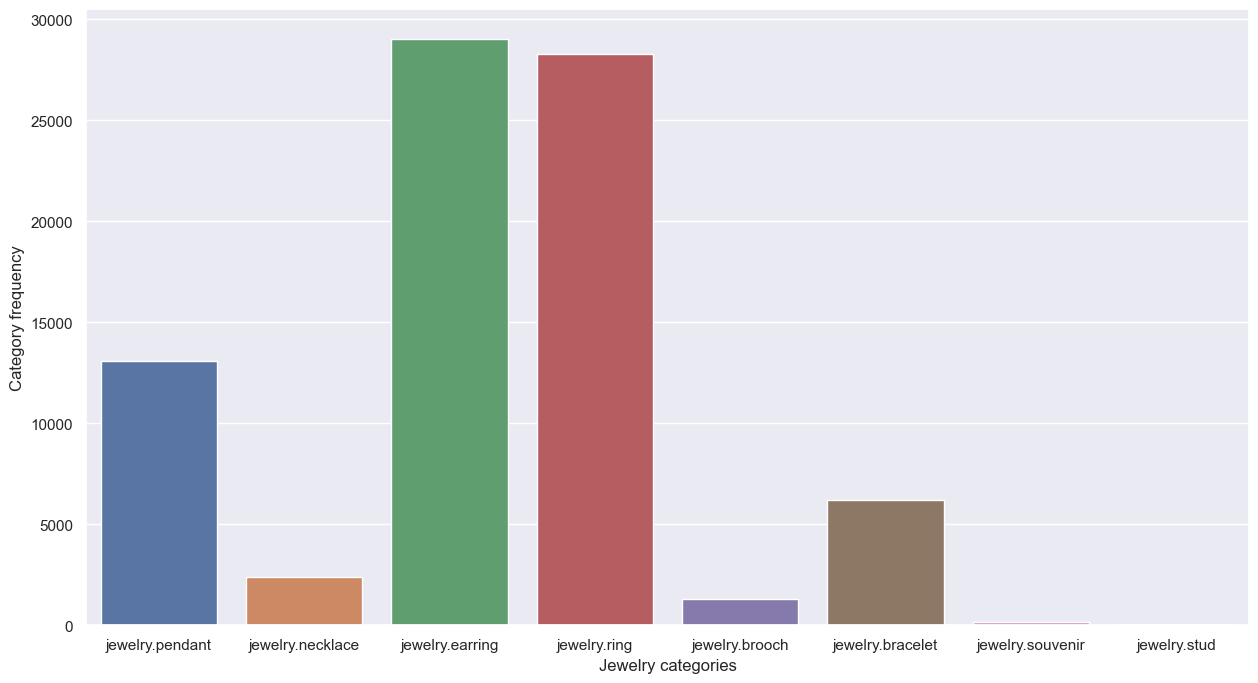

In [32]:
#  category count plot
plt.figure(figsize = (15,8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")

plt.show();plt.close()


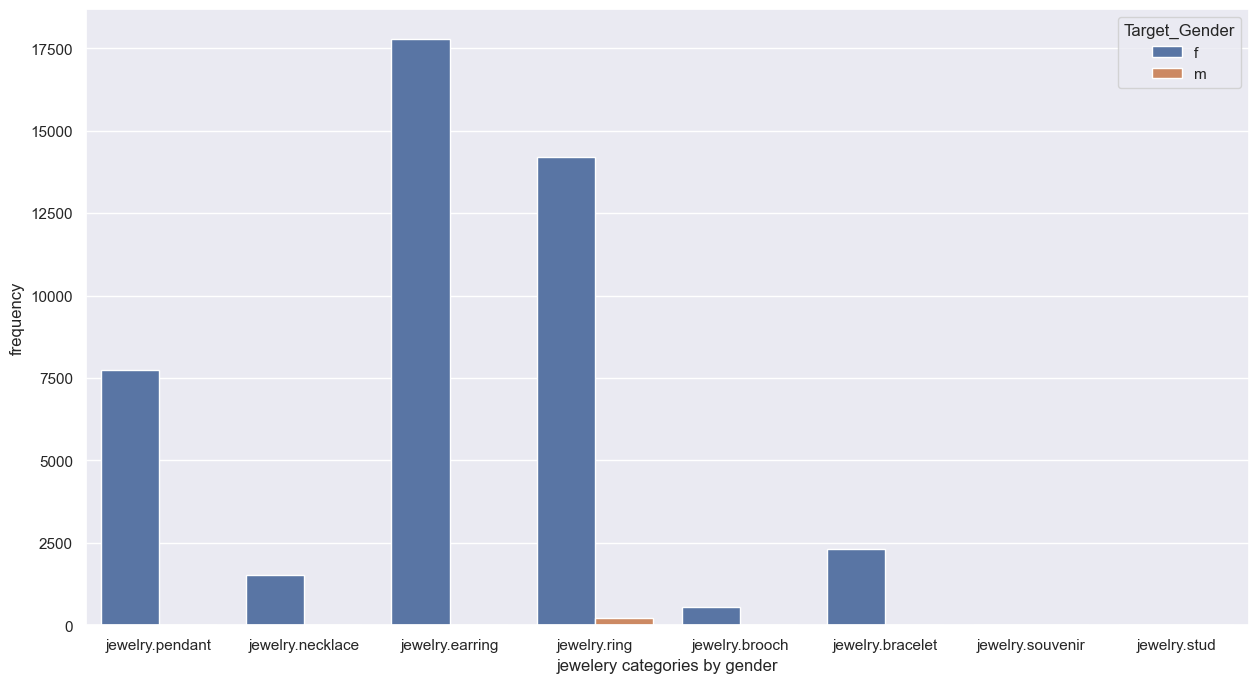

In [33]:
# jewelry category by gender
plt.figure(figsize = (15,8))

sns.countplot(data = real_categories, x = "Category", hue ="Target_Gender")

plt.xlabel("jewelery categories by gender")
plt.ylabel("frequency")

plt.show();plt.close()

In [34]:
#gender skew in original data
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [35]:
real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [36]:
#encode jewelry categories
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:,"Category"] = encoded                                   

In [37]:
#encode gender
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:,"Target_Gender"] = encoded                                   

In [38]:
#encode main gem
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:,"Main_Gem"] = encoded 

In [39]:
#encode color
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:,"Main_Color"] = encoded

In [40]:
#encode metal
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:,"Main_Metal"] = encoded

In [41]:
real_categories.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [43]:
#feature correlation
# spearman- categorical 
# pearson -numerical
correlations = real_categories.drop(labels = ["Order_Datetime","User_ID","Product_Id","Order_ID"], axis =1).corr(method="spearman") 

In [44]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


E:\Users\loise\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


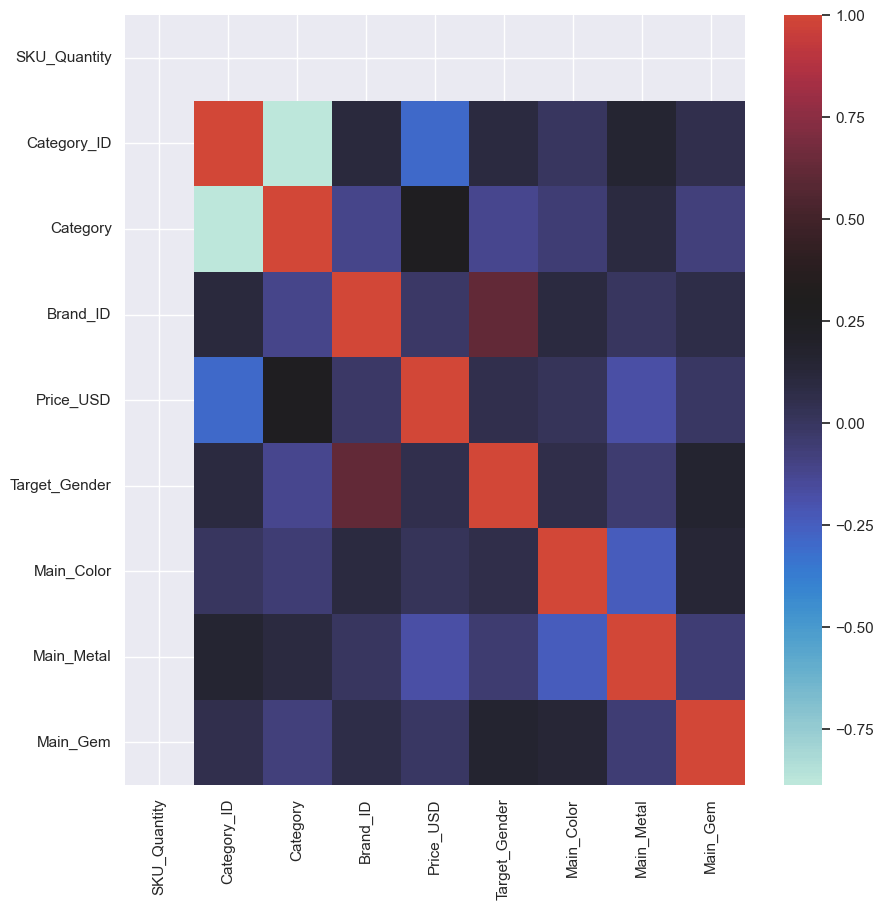

In [45]:
#correlation
plt.figure(figsize= (10,10))

sns.heatmap(correlations, annot = True, center =.3,fmt=".2f")

plt.show();plt.close()

In [46]:
#set correlation limits
upper =1
lower =.2

In [47]:
#0btain correlated features
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [48]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

## Data Implications
* missing values- jewelery
* data corruption - jewelery column
* rare values - Target_Gender
* low cardinality - SKU_Quantity
* Target skew - target variable strongly right-skewed
* 

## 03.Data Preparation
1.missing values -simple imputer
* 2.encoding categorical features
* 3.elimination of features
    * SKU_Quantity - feature invariance
    * Order_ID - no influence on jewlery price
    * Product_ID - Same as Order ID
    * Order_Datetime- not available in real-world
 4. Target Skew- TransformedTargetRegressor
  

High level steps
* eliminate less useful features
* extract records with actual categories
* encode categorical features (if required)
* account for target skew
* fix missing values

In [52]:
data.shape

(95910, 13)

In [53]:
# columns to eliminate
columns_to_eliminate = [
      "SKU_Quantity",
      "Order_ID",
      "Product_Id",
      "User_ID",
      "Category_ID"
]

In [54]:
data.drop(labels = columns_to_eliminate, axis =1, inplace = True)

In [55]:
data.drop(labels = ["Order_Datetime"], axis =1, inplace = True)

In [56]:
data.columns

Index(['Category', 'Brand_ID', 'Price_USD', 'Target_Gender', 'Main_Color',
       'Main_Metal', 'Main_Gem'],
      dtype='object')

In [57]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [58]:
# eliminate unrealistic categories
data = data.loc[data["Category"].isin(categories),:]

In [59]:
data.shape

(80458, 7)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# separate target variable from features
X,y = data.drop(labels = ["Price_USD"], axis =1), data["Price_USD"]

In [62]:
# create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1,random_state=42)

## 04.Data Modelling
* linear regression
* extremely random forest(extra trees)
* Adaptive boosting(AdaBoost)
* catboost

* encode categorical features (if required)* 
account for target skew* 
fix missing values

!pip install catboost


In [66]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [67]:
from sklearn.pipeline import Pipeline

def generate_pipline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False,):
    first_transformer = ColumnTransformer(
        transformer = [
            ("imputer",SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )    
    second_transformer = ColumnTransformer(
       transformer = [
           ("one_hot", OneHotEncoder(), categorical_indices)
       ],
        remainder = "passthrough",
        sparse_threshold = 0.
   )
   
    third_transformer = ColumnTransformer(
       transformer = [
           ("ordinal", ordinalEncoder(), categorical_indices)
       ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )
    steps = []
    if fill_missing:
        steps.append(("first",first_transformer))

    if label_encode:
        steps.append(("third",third_transformer))

    if one_hot:
        steps.append(("second",second_transformer))

    steps.append(("model", model))
    model_pipe = pipeline(steps= steps)

    return model_pipe

In [85]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing=True, one_hot=True, label_encode=False):
    try:
        first_transformer = ColumnTransformer(
            transformers=[
                ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0.0
        )
        
        second_transformer = ColumnTransformer(
            transformers=[
                ("one_hot", OneHotEncoder(), categorical_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0.0
        )
        
        third_transformer = ColumnTransformer(
            transformers=[
                ("ordinal", OrdinalEncoder(), categorical_indices)
            ],
            remainder="passthrough",
            sparse_threshold=0.0
        )
        
        steps = []
        if fill_missing:
            steps.append(("first", first_transformer))
        
        if label_encode:
            steps.append(("third", third_transformer))
        
        if one_hot:
            steps.append(("second", second_transformer))
        
        steps.append(("model", model))
        
        model_pipeline = Pipeline(steps=steps)
        
        return model_pipeline
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
        

In [87]:
# generate indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [89]:
categorical_indices

[0, 2, 3, 4, 5]

In [91]:
# catboost pipeline
cat_pipe =  generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, label_encode = True,one_hot = False
)

In [93]:
lin_pipe = generate_pipeline(
  LinearRegression(),
  column_indices,
  categorical_indices,
  fill_missing=True, 
  label_encode=False,  # Don't use label encoding for this case
  one_hot=True
)


In [95]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = 0.1),
    column_indices,
    categorical_indices,
    fill_missing = True, label_encode = False,one_hot = True
)

In [97]:
# ExtraTrees pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, label_encode = False,one_hot = True
)

In [99]:
from sklearn.preprocessing import PowerTransformer

In [101]:
# transform target skew
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))


In [103]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
91909,jewelry.bracelet,0.0,NaN,red,gold,NaN
37131,jewelry.earring,0.0,NaN,red,gold,fianit
2746,jewelry.ring,0.0,NaN,red,gold,NaN
9747,jewelry.ring,1.0,f,white,gold,diamond
64662,jewelry.earring,1.0,f,white,gold,diamond


In [105]:
#fit CatBoost
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9628561	total: 1.56s	remaining: 4h 19m 40s
1:	learn: 0.9246810	total: 1.59s	remaining: 2h 12m 38s
2:	learn: 0.8979131	total: 1.61s	remaining: 1h 29m 23s
3:	learn: 0.8703274	total: 1.63s	remaining: 1h 7m 47s
4:	learn: 0.8505533	total: 1.64s	remaining: 54m 44s
5:	learn: 0.8344408	total: 1.66s	remaining: 46m 5s
6:	learn: 0.8156692	total: 1.68s	remaining: 39m 56s
7:	learn: 0.7998825	total: 1.69s	remaining: 35m 16s
8:	learn: 0.7896245	total: 1.71s	remaining: 31m 36s
9:	learn: 0.7798330	total: 1.72s	remaining: 28m 41s
10:	learn: 0.7693439	total: 1.74s	remaining: 26m 18s
11:	learn: 0.7614911	total: 1.75s	remaining: 24m 18s
12:	learn: 0.7554553	total: 1.77s	remaining: 22m 41s
13:	learn: 0.7499818	total: 1.78s	remaining: 21m 13s
14:	learn: 0.7451660	total: 1.8s	remaining: 19m 58s
15:	learn: 0.7382845	total: 1.81s	remaining: 18m 52s
16:	learn: 0.7337081	total: 1.83s	remaining: 17m 56s
17:	learn: 0.7279493	total: 1.86s	remaining: 17m 10s
18:	learn: 0.7239151	total: 1.88s	remaining: 16

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x000002CCD0700610>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [107]:
#fit LR
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [109]:
#fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.1,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [110]:
#fit ExtraBoost
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

## 05.Model Evaluation
* R2
* RMSE(Root mean squared error)

In [113]:
from sklearn.metrics import r2_score,mean_squared_error

In [114]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [115]:
def generate_model_score(model,data,metric_function):
    X,y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [120]:
def print_metric(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f"Test {metric_name} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")

    return

In [122]:
def test_model(model, data, metric_name, metric_function):
    train,test = data

    if isinstance(metric_name, str):#single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metric(metric_name,train_score, test_score)
    else:#multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metric(name,train_score, test_score)   

    return
        


In [124]:
# name and function for metrics
metric_name = ["R2","RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [126]:
# create data variable
data_= [
    [X_train, y_train],
    [X_test, y_test]
]


In [128]:
# test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.316500735355966
Test R2 = 0.33079129963970466
Generalization error = -0.01429056428373865
Train RMSE = 361.35753408962626
Test RMSE = 381.96314918885884
Generalization error = -20.60561509923258


In [130]:
# test LR
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.07154053734289278
Test R2 = 0.06857122178107977
Generalization error = 0.002969315561813013
Train RMSE = 421.1623705714207
Test RMSE = 450.6252283225763
Generalization error = -29.462857751155582


In [132]:
# test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = -0.3650728551274973
Test R2 = -0.3008829494540657
Generalization error = -0.06418990567343164
Train RMSE = 510.67665312098256
Test RMSE = 532.5492615056488
Generalization error = -21.87260838466625


In [133]:
# test Extra
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.2113316426346704
Test R2 = 0.24677048430483695
Generalization error = -0.03543884167016653
Train RMSE = 388.1640373716283
Test RMSE = 405.232567209685
Generalization error = -17.06852983805669


## 06.Model Deployment

CatBoost pipeline performed best amongst all models its score were still bad(R2 score = 0.32)


Recommendations
* get more clean, well curated and all encompassing  dataset